# Data Analysis of the Connecticut Housing Market
This project uses real-world data obtained from [https://www.kaggle.com/datasets/joebeachcapital/house-prices-2001-2020](https://www.kaggle.com/datasets/joebeachcapital/house-prices-2001-2020) listing housing prices in Connecticut between 2001 and 2020. Due to its large size and our need to focus on a particular attribute for data visualization, the only columns used were the list year and sale price attributes.

## Data Breakdown and Visualization
### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pandas as pd

### Dataset Details

In [2]:
# Illustrates the first few rows from the dataset
df = pd.read_csv('Sales_01_20.csv')
df.head()

,List Year,Sale Amount
0,2020,325000.0
1,2020,430000.0
2,2020,179900.0
3,2020,890000.0
4,2020,1447500.0


### Box Plot of Dataset

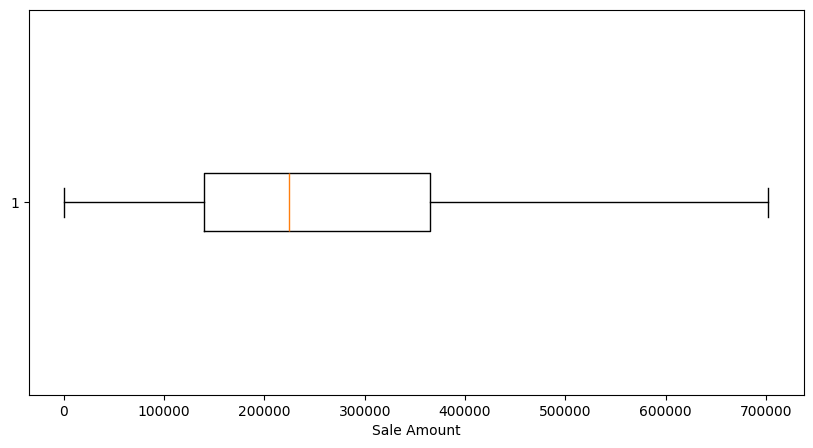

In [3]:
plt.figure(figsize=(10, 5))
plt.boxplot(df["Sale Amount"], vert=False, showfliers=False)
plt.xlabel("Sale Amount")
plt.show()

Based on the box plot:

- 25% of the Connecticut homes on sale went for less than ~$150K.

- 50% were on sale for between ~\$150K and ~\\$350K.

- The last 25% went on sale for more than ~$350K.

- The "typical" sale price for a Connecticut house was ~$225K.

### The Code

In [4]:
# Creates a list of the years from 2001-2020 for the x-axis of the bar graph
years: list[int] = [ year for year in range(2001, 2021) ]


def main(mean_stats=False, median_stats=False, std_stats=False, prob_stats=False, show_chart=True):
    """
    Manages which statistics to calculate and display.

    Args:
        mean_stats (bool): Indicates if mean statistics are to be calculated.
        median_stats (bool): Indicates if median statistics are to be calculated.
        std_stats (bool): Indicates if standard deviation statistics are to be calculated.
        prob_stats (bool): Indicates if probability statistics are to be calculated.
        show_chart (bool): Determines whether a bar chart or a table will display the data.

    Returns:
        None if show_chart is True. Otherwise, a Dataframe object is returned.
    """
    
    # Loads text file
    file_name = 'Sales_01_20.csv'
    # Skips first row
    og_data = np.loadtxt(file_name, delimiter=',', skiprows=1)

    # Ensures that one and only one stat will be displayed
    num_of_stats_selected = sum([mean_stats, median_stats, std_stats, prob_stats])
    assert num_of_stats_selected != 0, "Please specify at least one statistic to showcase."

    # Outputs table of multiple stats if more than one is inputted
    if num_of_stats_selected > 1:
        return calc_multiple_stats(og_data, mean_stats, median_stats, std_stats, prob_stats)
    # Otherwise, outputs table representing an individual stat
    elif mean_stats:
        return calc_stats(og_data, show_chart, mean=True)
    elif median_stats:
        return calc_stats(og_data, show_chart, median=True)
    elif std_stats:
        return calc_stats(og_data, show_chart, std=True)
    elif prob_stats:
        return calc_stats(og_data, show_chart, prob=True)


def get_best_fit_vars(X, Y):
    """
    Obtains slope and y-intercept values for the line of best fit.

    Args:
        X (list): Represents the x-coordinates.
        Y (list): Represents the y-coordinates.

    Returns:
        tuple: An numpy array of X and the slope and intercept.
    """
    x = np.array(X)
    y = Y
    m, b = np.polyfit(x, y, 1)
    return x, m, b


def generate_chart(stats, x_label, y_label, title):
    """
    Creates a bar chart representing changes to the statistical data over time.

    Args: 
        stats (list[float]): The statistical data to be displayed.
        x_label (str): Describes the independent variable plotted along the x-axis.
        y_label (str): Describes the dependent variable plotted along the y-axis.
        title (str): The name of the chart.
    """
    fig, ax = plt.subplots()
    ax.bar(years, stats)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    plt.plot(years, stats, color="orange", marker="o", linewidth=1)
    x, m, b = get_best_fit_vars(years, stats)
    plt.plot(years, m * x + b, color="red", label=f"y = {m:.2f}x + {b:.2f}", linestyle="dashed")
    ax.set_xticks([2000, 2005, 2010, 2015, 2020])
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.xticks(rotation=45)
    plt.show()


def generate_table(sale_stats, table_cols, percentile=False):
    """
    Creates a table representing changes to the statistical data over time.
    
    Args:
        sale_stats (list[float]): The statistical data to be displayed.
        table_cols (list[str]): The names of the columns in the matrix.
        percentile (bool): Indicates whether the data should be displayed as a percentile or not.

    Returns:
        pd.DataFrame: A structure to visualize the data in an organized format.
    """
    # Determines whether stats should be formated percentile or 2-point float
    if percentile:
        stats = [ f"{stat_from_some_year:.2%}" for stat_from_some_year in sale_stats ]
    else:
        stats = [ f"${stat_from_some_year:,.2f}" for stat_from_some_year in sale_stats ]

    # Creates two-column matrix
    column_values = np.array([
        years,
        stats
    ]).T

    df = pd.DataFrame(column_values, columns=table_cols)
    return df

        
def calc_stats(og_data, show_chart, mean=False, median=False, std=False, prob=False):
    """
    Handles statistical calculations and chart/table generation.
    
    Args:
        og_data (np.ndarray): Represents the entire raw dataset.
        show_chart (bool): Determines whether a bar chart or a table will display the data.
        mean (bool): Indicates if mean statistics are to be calculated.
        median (bool): Indicates if median statistics are to be calculated.
        std (bool): Indicates if standard deviation statistics are to be calculated.
        prob (bool): Indicates if probability statistics are to be calculated.

    Returns:
         None if the user generates a chart. Otherwise, returns a DataFrame object representing a table of the statistical data.
    """
    stats: list[float] = []
    x_label = 'Year'

    # Ensures a single statistic is provided to calculate
    num_of_stats_selected = sum([mean, median, std, prob])
    assert num_of_stats_selected == 1, f"One and only one statistic was expected, {num_of_stats_selected} inputted."
    
    for year in range(2001, 2021):
        # Filters data to retrieve sales from a given year and build a temporary list of the sales from that year
        data_from_some_year = og_data[og_data[:, 0] == year]

        # Using the data from a given year, calculates the corresponding statistic
        if mean:
            title = 'Mean Price of Residential Units by Year'
            y_label = 'Mean Sale Price'
            stat_from_some_year: float = data_from_some_year[:, 1].mean()
        elif median:
            title = 'Median Price of Residential Units by Year'
            y_label = 'Median Sale Price'
            stat_from_some_year: float = np.median(data_from_some_year[:, 1])
        elif std:
            title = 'Standard Deviation of Residential Units by Year'
            y_label = 'Standard Deviation in Sale Pricing (in Millions)'
            stat_from_some_year: float = data_from_some_year[:, 1].std()
        else:
            title = 'Probability of \\$200K–\\$300K Prices by Year'
            y_label = 'Probability (\\$200K–\\$300K)'
            data_in_range_from_some_year = data_from_some_year[(200_000 <= data_from_some_year[:, 1]) &
                                                            (data_from_some_year[:, 1] <= 300_000)]
            stat_from_some_year: float = len(data_in_range_from_some_year) / len(data_from_some_year)

        # Adds those yearly statistics to a list for reference when creating the y-axis of bar graph
        stats.append(
            stat_from_some_year
        )

    # Determines whether to present the statistics with a chart or a table
    if show_chart:
        generate_chart(stats, x_label, y_label, title)
    else:
        if prob:
            return generate_table(stats, [x_label, y_label], True)
        else:
            return generate_table(stats, [x_label, y_label])


def calc_multiple_stats(og_data, mean=False, median=False, std=False, prob=False):
    """
    Calculates multiple statistics from the dataset and organizes them into a single table to view.

    Args:
        og_data (np.ndarray): Represents the entire raw dataset.
        mean (bool): Indicates if mean statistics are to be calculated.
        median (bool): Indicates if median statistics are to be calculated.
        std (bool): Indicates if standard deviation statistics are to be calculated.
        prob (bool): Indicates if probability statistics are to be calculated.

    Returns:
        pd.Dataframe: The table summarizing the statistics of the data over time.
    """
    mean_sale_stats: list[float] = []
    std_sale_stats: list[float] = []
    prob_sale_stats: list[float] = []
    median_sale_stats: list[float] = []
    
    for year in range(2001, 2021):
        # Filters data to retrieve sales from a given year and build a temporary list of the sales from that year
        data_from_some_year = og_data[og_data[:, 0] == year]
        
        # Using the data from that year, calculates the mean, median, std, and probability of a sale falling between $200K-300K
        if mean:
            mean_from_some_year: float = data_from_some_year[:, 1].mean()
        if median:
            median_from_some_year: float = np.median(data_from_some_year[:, 1])
        if std:
            std_from_some_year: float = data_from_some_year[:, 1].std()
        if prob:
            data_in_range_from_some_year = data_from_some_year[(200_000 <= data_from_some_year[:, 1]) &
                                                               (data_from_some_year[:, 1] <= 300_000)]
            prob_from_some_year: float = len(data_in_range_from_some_year) / len(data_from_some_year)
    
        # Adds those yearly statistics to a list for reference when creating the y-axis of bar graph
        if mean:
            mean_sale_stats.append(mean_from_some_year)
        if median:
            median_sale_stats.append(median_from_some_year)
        if std:
            std_sale_stats.append(std_from_some_year)
        if prob:
            prob_sale_stats.append(prob_from_some_year)

    # Creates 5-column matrix representing years and statistics
    column_values = np.array([
            years,
            [ f"${mean_from_some_year:,.2f}" for mean_from_some_year in mean_sale_stats ],
            [ f"${median_from_some_year:,.2f}" for median_from_some_year in median_sale_stats ],
            [ f"${std_from_some_year:,.2f}" for std_from_some_year in std_sale_stats ],
            [ f"{prob_from_some_year:.2%}" for prob_from_some_year in prob_sale_stats ]
        ]).T
    
    df = pd.DataFrame(column_values, columns=['Year', 'Mean Sales', 'Median Sales', 'Standard Deviation of Sales', 'Probability of Sale Being Between \\$200K and \\$300K'])
    return df


### Mean

#### Bar Chart

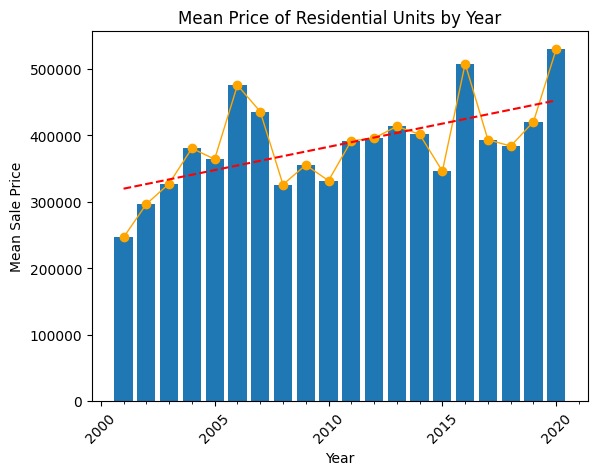

In [5]:
main(mean_stats=True, show_chart=True)

#### Table

In [6]:
main(mean_stats=True, show_chart=False)

,Year,Mean Sale Price
0,2001,"$246,235.04"
1,2002,"$296,357.12"
2,2003,"$327,217.93"
3,2004,"$380,297.01"
4,2005,"$364,030.13"
5,2006,"$475,379.23"
6,2007,"$435,713.38"
7,2008,"$325,831.79"
8,2009,"$355,250.33"
9,2010,"$331,657.47"


#### Observations
- The average market price for housing has been increasing ${\textemdash}$ doubling from \$250K in 2001 to \\$500K in 2020.
    - This doesn't necessarily mean that houses are getting more costly in Connecticut (it could just be that there is a high number of outliers representing highly expensive houses in the dataset).

### Median
#### Bar Chart

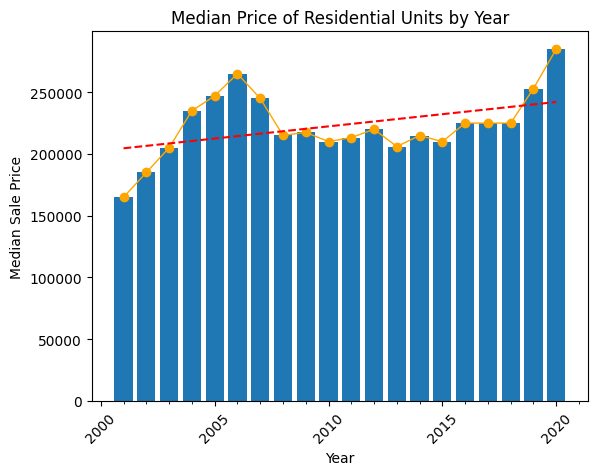

In [7]:
main(median_stats=True, show_chart=True)

### Table

In [8]:
main(median_stats=True, show_chart=False)

,Year,Median Sale Price
0,2001,"$165,000.00"
1,2002,"$185,000.00"
2,2003,"$205,000.00"
3,2004,"$235,000.00"
4,2005,"$247,000.00"
5,2006,"$265,000.00"
6,2007,"$245,000.00"
7,2008,"$215,000.00"
8,2009,"$217,500.00"
9,2010,"$210,000.00"


#### Observations
- The median sale of housing is slightly rising.
    - Because the median is less prone to outliers, this is indicative that houses are becoming more expensive in Connecticut.
- Median sale prices are only ever between \$100K and \\$200K from 2001-2002.

### Standard Deviation
#### Bar Chart

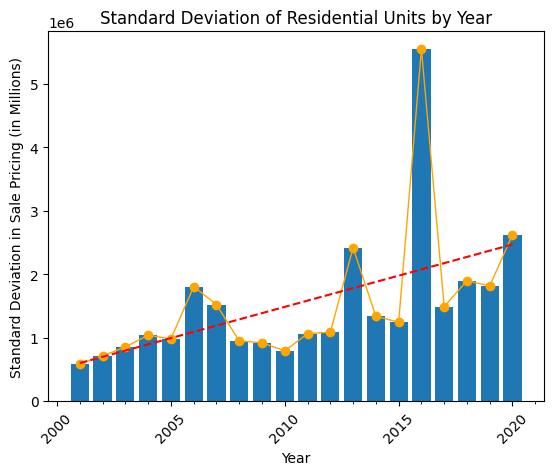

In [9]:
main(std_stats=True, show_chart=True)

#### Table

In [10]:
main(std_stats=True, show_chart=False)

,Year,Standard Deviation in Sale Pricing (in Millions)
0,2001,"$587,961.37"
1,2002,"$711,353.42"
2,2003,"$852,406.39"
3,2004,"$1,037,222.84"
4,2005,"$978,403.13"
5,2006,"$1,803,537.63"
6,2007,"$1,520,524.36"
7,2008,"$946,576.04"
8,2009,"$919,126.62"
9,2010,"$790,797.63"


#### Observations
- The distribution of sale prices has expanded over time.
    - Most notable is 2016, which experiences a massive spike.
    - This implies that the housing market is becoming more unpredictable and prone to change. In turn, as price swings grow larger, consumers may find a bargain in one period and be faced with exorbitant prices in another.
- From 2001 onward, we can observe the general trend wherein the standard deviation of sales increases. This is highlighted by the standard deviation of sales being at its lowest in 2001 with about \$600K, and at its highest in 2016 with \\$5.5M. This indicates that a housing market that is becoming more and more unpredictable and unstable.
  
### Probability
#### Bar Chart

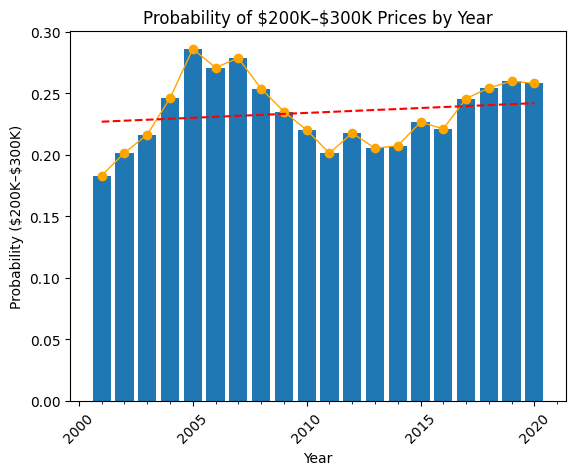

In [11]:
main(prob_stats=True, show_chart=True)

#### Table

In [12]:
main(prob_stats=True, show_chart=False)

,Year,Probability (\$200K–\$300K)
0,2001,18.31%
1,2002,20.17%
2,2003,21.64%
3,2004,24.61%
4,2005,28.60%
5,2006,27.10%
6,2007,27.86%
7,2008,25.38%
8,2009,23.52%
9,2010,22.02%


#### Observations

&emsp;&emsp;Looking at the bar chart, we can see that the market has experienced multiple periods of increased and decreased pricing of houses between \$200K-\\$300K. But based on the bigger picture illustrated by the linear regression line, the overall trend over the years has been subtle shift towards housing prices in this range.

### Summary Table

In [13]:
main(mean_stats=True, median_stats=True, std_stats=True, prob_stats=True)

,Year,Mean Sales,Median Sales,Standard Deviation of Sales,Probability of Sale Being Between \$200K and \$300K
0,2001,"$246,235.04","$165,000.00","$587,961.37",18.31%
1,2002,"$296,357.12","$185,000.00","$711,353.42",20.17%
2,2003,"$327,217.93","$205,000.00","$852,406.39",21.64%
3,2004,"$380,297.01","$235,000.00","$1,037,222.84",24.61%
4,2005,"$364,030.13","$247,000.00","$978,403.13",28.60%
5,2006,"$475,379.23","$265,000.00","$1,803,537.63",27.10%
6,2007,"$435,713.38","$245,000.00","$1,520,524.36",27.86%
7,2008,"$325,831.79","$215,000.00","$946,576.04",25.38%
8,2009,"$355,250.33","$217,500.00","$919,126.62",23.52%
9,2010,"$331,657.47","$210,000.00","$790,797.63",22.02%


## Conclusion
In housing market analysis, the median is generally more reliable than the mean, since the mean is heavily influenced by outliers. Given that house prices can vary widely due to size, age, condition, location, and neighborhood characteristics (e.g., crime rates, shopping centers, schools, etc.) the median better reflects what the “typical” buyer experiences.

Because both mean and median prices have risen steadily, the signal is clear: the market as a whole is becoming more expensive.

Taken altogether, the statistics reveal:

- Prices are climbing: Both mean and median home values have doubled between 2001 and 2020, reflecting broad upward pressure.

- Volatility is rising: A growing standard deviation indicates less predictability, likely tied to a widening gap between entry-level and luxury homes.

- Affordability is shrinking: Despite minor increases in the \$200K–\\$300K sales based on linear regression, the increase in median values show that buyers below the \\\$200K threshold are being priced out, with the bulk of the market shifting upward and toward the \\\$300K threshold.

In short, the Connecticut housing market is becoming more expensive, less stable, and less accessible over time.
